# Conduct a financial analysis of stocks for the companies in the Standard and Poor's S&P 100. 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Step 1: Examine the lists

#### Reading the file and exploring the data set. 

In [4]:
df = pd.read_csv('sector.csv')

In [5]:
df.columns

Index(['Name', 'Sector', 'Price', 'EPS'], dtype='object')

In [6]:
df.head()

,Name,Sector,Price,EPS
0,Apple Inc,Information Technology,170.12,9.20
1,Abbvie Inc,Health Care,93.29,5.31
2,Abbott Laboratories,Health Care,55.28,2.41
3,Accenture Plc,Information Technology,145.30,5.91
4,Allergan Plc,Health Care,171.81,15.42


In [7]:
df.shape

(102, 4)

#### Defining Lists 

In [8]:
names, prices, earnings,sectors = df['Name'],df['Price'],df['EPS'],df['Sector']

#### Filtering the first four items of names 

In [9]:
print(names[0:4])

0              Apple Inc
1             Abbvie Inc
2    Abbott Laboratories
3          Accenture Plc
Name: Name, dtype: object


#### Filtering information on last company in the dataset

In [14]:
print(names[101])
print(prices[101])
print(earnings[101])
print(sectors[101])

Exxon Mobil Corp
80.31
3.56
Energy


## Step 2: Convert lists to arrays and perform array opeartions

In [11]:
prices_array=np.array(prices)
earnings_array = np.array(earnings)

#### Calculating P/E ratio 

In [12]:
pe = (prices_array/earnings_array)
print(pe)

[  18.49130435   17.56873823   22.93775934   24.58544839   11.14202335
   23.70517928   14.8011782    13.42845787  285.99492386   17.99233716
   27.18358974   15.25714286   14.44742937   15.19596542   21.99767981
   20.43243243   28.81875994   13.8477842    24.75135135   16.075
  215.0310559    25.14285714   17.88613861   11.64379947 2494.5
   29.41924399   16.76497696   12.29071804   32.16806723   24.02313625
   18.07368421   19.91235955   19.43169399   23.31007752   16.66129032
    7.20833333   34.51637765   18.2829555    15.84375      16.21875
   19.73187686   14.44354839    7.47703549    7.22778675   34.09708738
   34.6196853    12.3984375    56.94520548   24.44396552   21.30071942
   11.08345534   14.11320755   19.40336134   14.20461095   22.63764045
   26.21538462   24.12698413   20.28606357   24.60141509   18.76267281
   34.78654292   26.0953125    20.72682927   16.95522388    9.97115385
   25.97653631   21.04746835   21.37251356   13.81491003   13.5900277
   24.40532544   23.34

#### Filtering arrays by sector Information Technology 

In [54]:
boolean_array = (sectors == 'Information Technology')
it_names = names[boolean_array]
it_pe = pe[boolean_array]
print(it_names.values)
print(it_pe)


['Apple Inc' 'Accenture Plc' 'Cisco Systems Inc' 'Facebook Inc'
 'Alphabet Class C' 'Alphabet Class A' 'International Business Machines'
 'Intel Corp' 'Mastercard Inc' 'Microsoft Corp' 'Oracle Corp'
 'Paypal Holdings' 'Qualcomm Inc' 'Texas Instruments' 'Visa Inc']
[18.49130435 24.58544839 16.76497696 34.51637765 34.09708738 34.6196853
 11.08345534 14.11320755 34.78654292 24.40532544 19.20392157 54.67857143
 17.67989418 24.28325123 31.68678161]


#### Filtering arrays by sector Consumer Staples

In [55]:
boolean_array = (sectors == 'Consumer Staples')
cs_names = names[boolean_array]
cs_pe = pe[boolean_array]
print(cs_names.values)
print(cs_pe)

['Colgate-Palmolive Company' 'Costco Wholesale' 'CVS Corp'
 'Kraft Heinz Co' 'Coca-Cola Company' 'Mondelez Intl Cmn A' 'Altria Group'
 'Pepsico Inc' 'Procter & Gamble Company'
 'Philip Morris International Inc' 'Walgreens Boots Alliance'
 'Wal-Mart Stores']
[25.14285714 29.41924399 12.29071804 22.63764045 24.12698413 20.72682927
 21.04746835 22.55859375 22.19346734 23.01781737 13.7745098  22.03669725]


#### Summarizing sector data - calculate the mean and standard deviation of P/E ratios for Information Technology and Consumer Staples sectors

In [23]:
it_pe_mean = np.mean(it_pe)
it_pe_std = np.std(it_pe)
print(round(it_pe_mean,2))
print(round(it_pe_std,2))

26.33
10.87


In [25]:
cs_pe_mean = np.mean(cs_pe)
cs_pe_std = np.std(cs_pe)
print(round(cs_pe_mean,2))
print(round(cs_pe_std,2))

21.58
4.41


# Step3: Visualizations 

#### Plot P/E ratios -  take a closer look at the P/E ratios using a scatter plot for each company in these two sectors.ake a closer look at the P/E ratios using a scatter plot for each company in these two sectors.

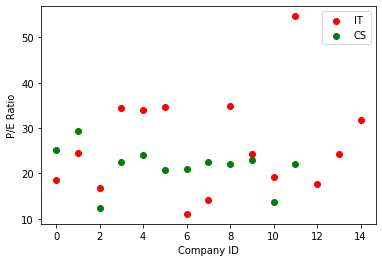

In [71]:
x_axis_it= np.arange (0,len(it_names),1)
x_axis_cs= np.arange (0,len(cs_names),1)
plt.scatter(x_axis_it,it_pe, color = 'red', label = 'IT')
plt.scatter(x_axis_cs,cs_pe, color = 'green', label = 'CS')
plt.legend()
plt.xlabel('Company ID')
plt.ylabel('P/E Ratio')
plt.show()

__From the above plot we can see that there is an outlier coesponding to the IT sector.__

#### Histogram of P/E ratios - To visualize and understand the distribution of the P/E ratios in the IT sector 

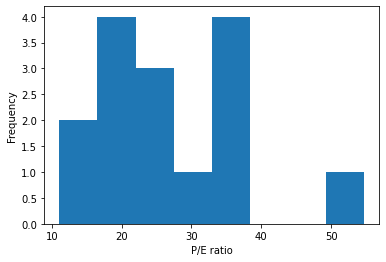

In [35]:
plt.hist(x=it_pe, bins=8)
plt.xlabel('P/E ratio')
plt.ylabel('Frequency')
plt.show()

__From the above histogram we observe that there is a stock (outlier) with P/E ratio > 50__  

#### Identifying the name of the company (outlier)

In [69]:
value1 = 50
outlier_price = it_pe [it_pe > value1]
outlier_name = it_names [it_pe > value1].values
print(outlier_name)
print(f"Companies found = {len(outlier_name)}")

['Paypal Holdings']
Companies found = 1


In [70]:
list_items = []
for i in range (len(outlier_name)):
    list_items = list_items + ["In 2017, " + outlier_name[i] +" had an abnormally high P/E ratio of "+ str(round(outlier_price[i],2))+"."]
print(list_items)

['In 2017, Paypal Holdings had an abnormally high P/E ratio of 54.68.']


In [72]:
now = datetime.datetime.now()
print(now)

2021-03-24 21:13:42.016729
